In [1]:
import cv2

In [2]:
import tensorflow as tf 

In [3]:
import numpy as np
from matplotlib import pyplot as plt 

In [72]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


In [5]:
#If dataset is not downloaded, download it from [here](https://www.kaggle.com/jangedoo/utkface-new)


In [6]:
fldr = "./UTKFace"

In [7]:
import os
files =os.listdir(fldr)

In [8]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)


./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [9]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

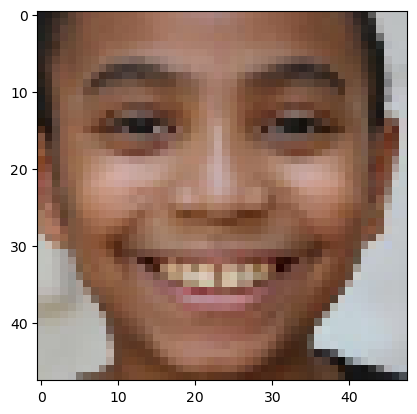

In [10]:
plt.imshow(images[87])

In [11]:
print(ages[87])
print(genders[87])

10
0


In [12]:
images_f= np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [13]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)


In [14]:
##Plotting samples


In [15]:
#To find no of elements in datset
values,counts=np.unique(genders_f,return_counts=True)
print(counts)


[12391 11317]


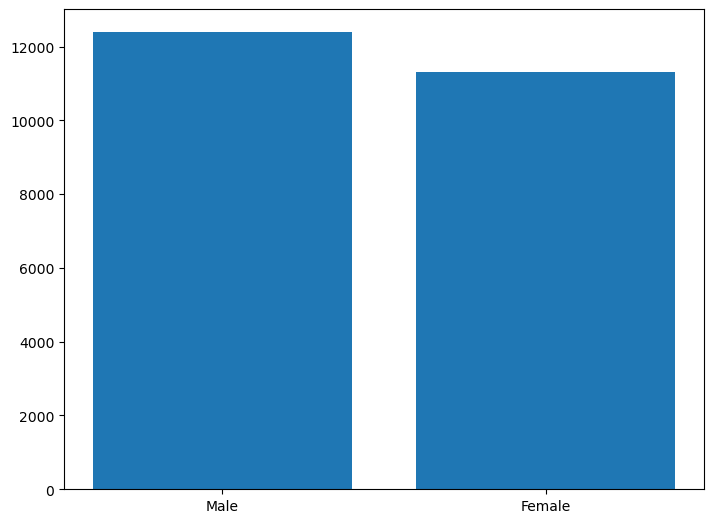

In [16]:
#plotting number of male and females in samples
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [17]:
#Finding no. of samples in each age
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


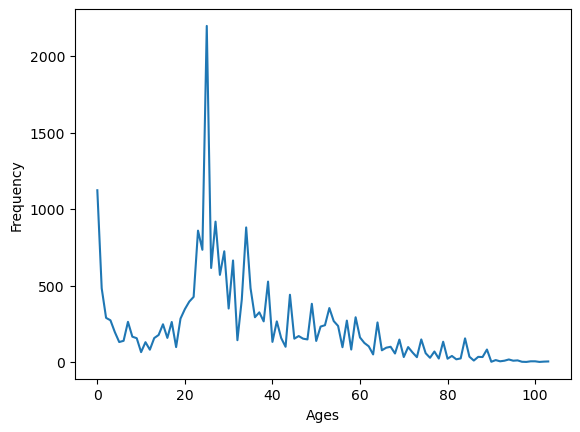

In [18]:
#converting age counts to lists
val=values.tolist()
cnt=counts.tolist()
#plotting the agewise samples
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

In [19]:
#splitting the data and defining labels for output 
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [21]:
images_f_2=images_f/255
images_f_2.shape

(23708, 48, 48, 3)

In [22]:
labelsf=np.array(labels)

In [23]:
#importing library for training and testing the dataset
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labelsf,test_size=0.25)

In [25]:
Y_train[0:5]

array([[77,  0],
       [24,  1],
       [35,  1],
       [26,  1],
       [35,  0]])

In [26]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [27]:
Y_train_2[0][0:5]

array([0, 1, 1, 1, 0])

In [28]:
Y_train_2[1][0:5]

array([77, 24, 35, 26, 35])

In [37]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [40]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs, 32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution (maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution (maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution (maxp_3,256)  
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4) 
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64, activation='relu') (flatten)
    dense_2=Dense(64, activation='relu') (flatten)
    drop_1=Dropout (0.2) (dense_1)
    drop_2=Dropout (0.2) (dense_2)

    output_1=Dense(1, activation='sigmoid', name='sex_out') (drop_1)
    output_2=Dense(1,activation='relu', name='age_out') (drop_2)
    model=Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"],optimizer="Adam", metrics=["accuracy"])
    return model 

In [41]:
Model=model((48,48,3))

In [42]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 48, 48, 32)           896       ['input_3[0][0]']             
                                                                                                  
 dropout_1 (Dropout)         (None, 48, 48, 32)           0         ['conv2d_1[0][0]']            
                                                                                                  
 activation_1 (Activation)   (None, 48, 48, 32)           0         ['dropout_1[0][0]']           
                                                                                              

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [44]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [45]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


278/278 [==============================] - ETA: 0s - loss: 16.9722 - sex_out_loss: 0.6814 - age_out_loss: 16.1176 - sex_out_accuracy: 0.5783 - age_out_accuracy: 0.0477
Epoch 1: val_loss improved from inf to 19.03216, saving model to Age_Sex_Detection.h5


c:\Users\sriva\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 73s 248ms/step - loss: 16.9722 - sex_out_loss: 0.6814 - age_out_loss: 16.1176 - sex_out_accuracy: 0.5783 - age_out_accuracy: 0.0477 - val_loss: 19.0322 - val_sex_out_loss: 0.6289 - val_age_out_loss: 18.2438 - val_sex_out_accuracy: 0.6843 - val_age_out_accuracy: 0.0461
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.3341 - sex_out_loss: 0.5759 - age_out_loss: 12.5545 - sex_out_accuracy: 0.7018 - age_out_accuracy: 0.0470
Epoch 2: val_loss improved from 19.03216 to 12.35202, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 65s 233ms/step - loss: 13.3341 - sex_out_loss: 0.5759 - age_out_loss: 12.5545 - sex_out_accuracy: 0.7018 - age_out_accuracy: 0.0470 - val_loss: 12.3520 - val_sex_out_loss: 0.5393 - val_age_out_loss: 11.5683 - val_sex_out_accuracy: 0.7387 - val_age_out_accuracy: 0.0452
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 11.0454 - sex_out_loss: 0.4989 - a

In [46]:
#evaluating model and plotting results
Model.evaluate(X_test,Y_test_2)  

186/186 [==============================] - 4s 19ms/step - loss: 7.6242 - sex_out_loss: 0.2883 - age_out_loss: 6.2317 - sex_out_accuracy: 0.8871 - age_out_accuracy: 0.0461


[7.624151229858398,
 0.28830471634864807,
 6.231684684753418,
 0.8871266841888428,
 0.04606040194630623]

In [47]:
pred=Model.predict(X_test)

186/186 [==============================] - 3s 15ms/step


In [54]:
pred[1]

array([[70.94821 ],
       [22.948414],
       [58.836357],
       ...,
       [23.53696 ],
       [31.120548],
       [25.655136]], dtype=float32)

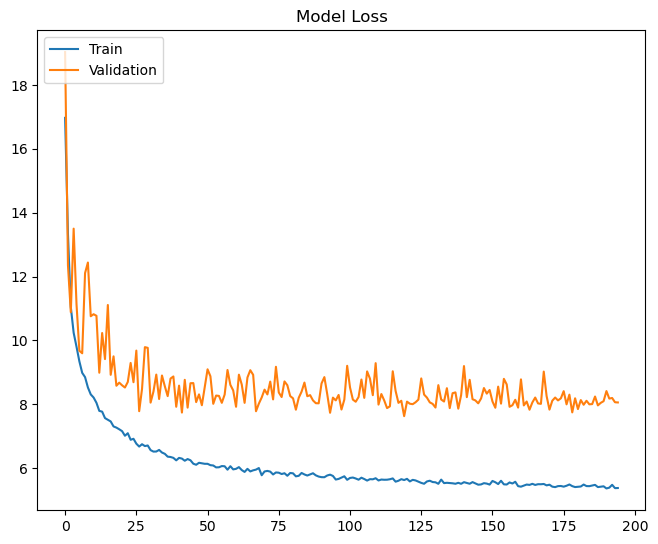

In [48]:
#Model loss plot
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

TypeError: 'str' object is not callable

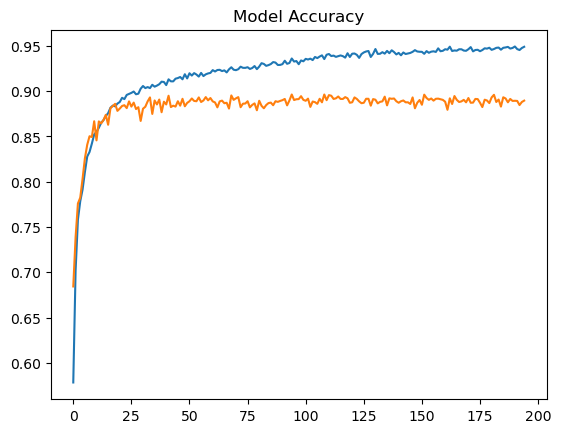

In [59]:
#Sex_out_accuracy
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


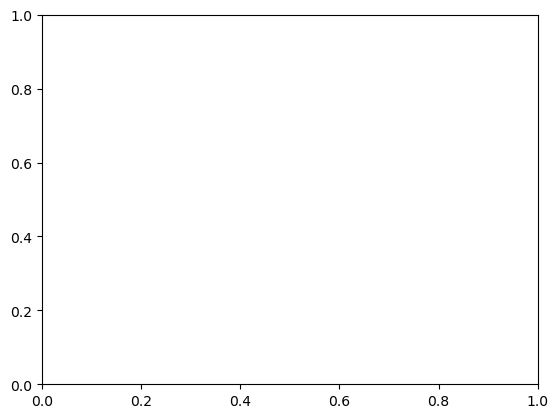

In [58]:
#actual vs predicted age plot
fig.ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [60]:
#reporting the model
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1
    


In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
report = classification_report(Y_test_2[0],Pred_l)

In [64]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3090
           1       0.86      0.91      0.89      2837

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [65]:
#heatmap
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

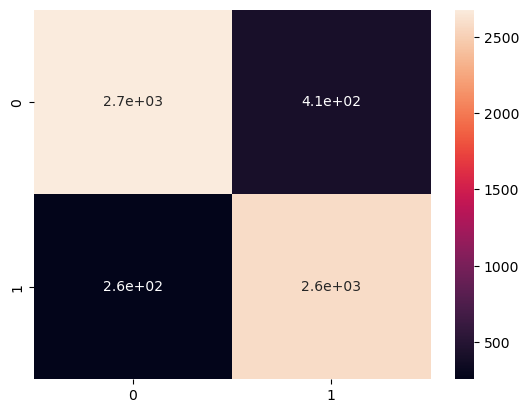

In [66]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [68]:
#predicting age and image
def test_image(ind,image_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 [==============================] - 0s 77ms/step
Predicted Age is 82
Predicted Gender is Female


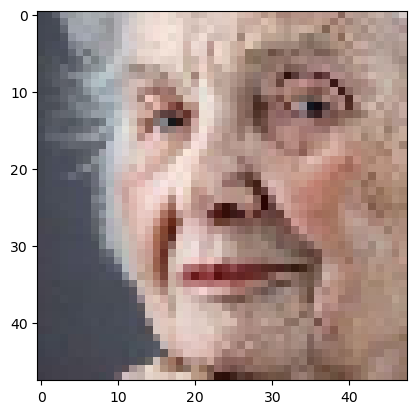

In [69]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 42ms/step
Predicted Age is 10
Predicted Gender is Male


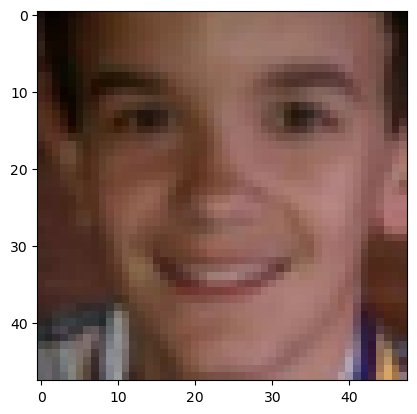

In [70]:
test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 47ms/step
Predicted Age is 10
Predicted Gender is Female


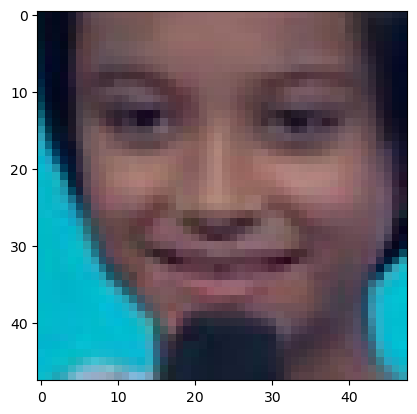

In [71]:
test_image(168,images_f,images_f_2,Model)